# **1. Perkenalan Dataset**


**Dataset:** [Global Earthquake & Tsunami Risk Assessment](https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset)

Dataset ini memuat catatan historis terkait aktivitas gempa bumi dan tsunami, termasuk parameter intensitas, kedalaman, magnitudo, lokasi geospasial, serta indikator risiko tsunami. Studi hubungan antara magnitudo, kedalaman, lokasi, dan faktor lain terhadap risiko tsunami.

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# **3. Memuat Dataset**

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset
!unzip global-earthquake-tsunami-risk-assessment-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
global-earthquake-tsunami-risk-assessment-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  global-earthquake-tsunami-risk-assessment-dataset.zip
replace earthquake_data_tsunami.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: earthquake_data_tsunami.csv  


In [4]:
df = pd.read_csv("earthquake_data_tsunami.csv")
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


# **4. Exploratory Data Analysis (EDA)**


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [6]:
df.shape

(782, 13)

In [7]:
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


In [8]:
df.isnull().sum()

,0
magnitude,0
cdi,0
mmi,0
sig,0
nst,0
dmin,0
gap,0
depth,0
latitude,0
longitude,0


In [9]:
duplicate_count = df.duplicated().sum()
duplicate_count

np.int64(0)

In [10]:
df.dtypes

,0
magnitude,float64
cdi,int64
mmi,int64
sig,int64
nst,int64
dmin,float64
gap,float64
depth,float64
latitude,float64
longitude,float64


In [11]:
print(df.columns)

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')


In [12]:
df['tsunami'].value_counts()


,count
tsunami,
0,478
1,304


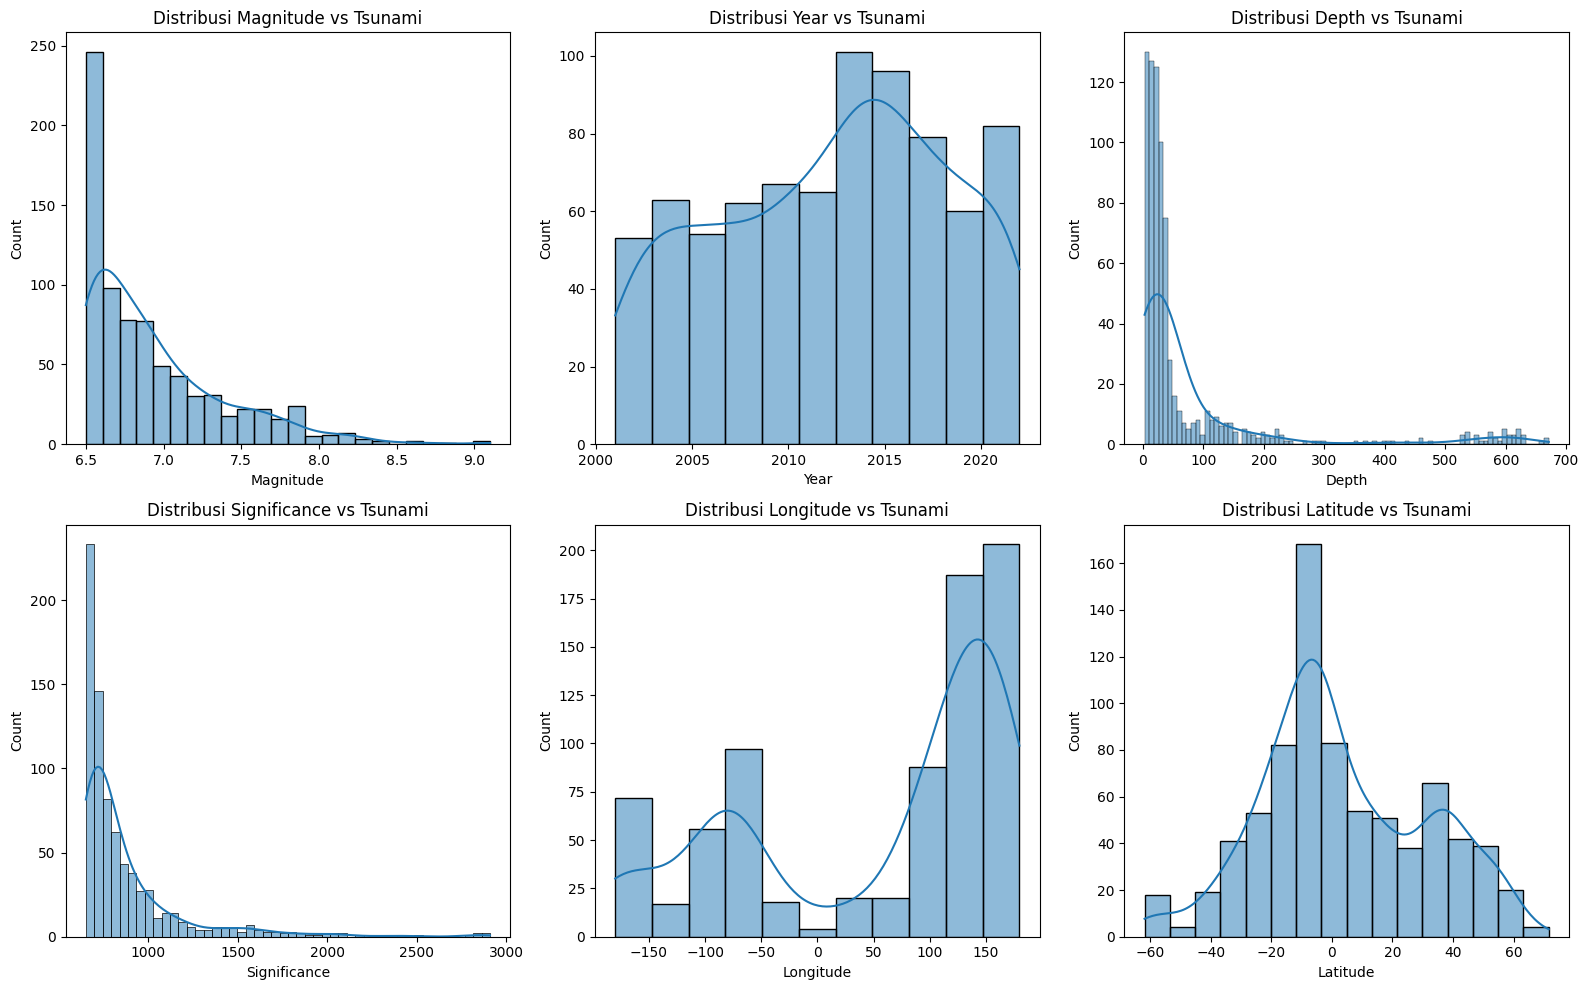

In [13]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10))

cols = ["magnitude", "Year", "depth", "sig", "longitude", "latitude"]
titles = ["Magnitude", "Year", "Depth", "Significance", "Longitude", "Latitude"]

index = 0
for i in range(2):
    for j in range(3):
        sns.histplot(df[cols[index]], kde=True, ax=ax[i, j])
        ax[i, j].set_title(f"Distribusi {titles[index]} vs Tsunami")
        ax[i, j].set_xlabel(titles[index])
        ax[i, j].set_ylabel("Count")
        index += 1

plt.tight_layout()
plt.show()


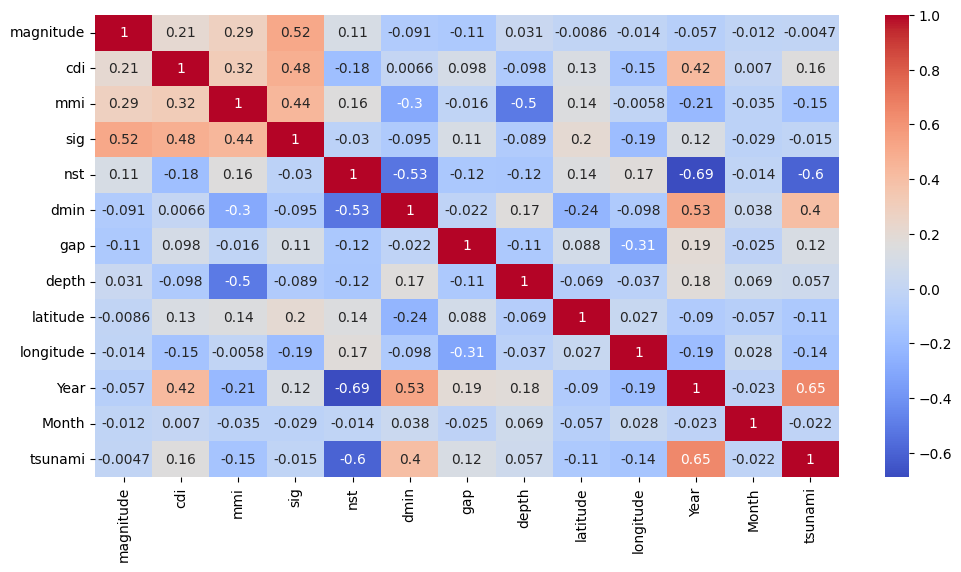

In [14]:
corr = df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# **5. Data Preprocessing**

In [16]:
data = df.copy()

In [17]:
data = data.dropna()


In [18]:
data = data.drop_duplicates()

In [19]:
from sklearn.preprocessing import StandardScaler

numeric_features = df.drop('tsunami', axis=1).columns.tolist()

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

df_scaled.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,0.132235,1.157305,0.708588,-0.316853,-0.452952,-0.368342,-0.332058,-0.451079,-0.488691,0.908026,1.594601,1.265413,1
1,-0.092369,-0.105356,-1.343693,-0.419255,-0.524943,0.407346,0.370143,-0.370898,-0.311296,0.408482,1.594601,1.265413,0
2,0.132235,-0.421022,-2.027786,-0.357193,-0.332965,0.811425,-0.290752,3.667319,-0.864507,-1.960180,1.594601,1.265413,1
3,0.806045,0.210309,-0.659599,-0.115152,-0.324966,0.243189,-0.166834,-0.283427,-0.836690,-1.907414,1.594601,1.265413,1
4,-0.766179,-1.368018,-2.711880,-0.620956,-0.396958,1.656114,0.081001,3.998715,-1.067688,1.066585,1.594601,1.265413,1


In [20]:
df_scaled.to_csv("earthquake_data_tsunami_scaled.csv", index=False)

print("Dataset baru telah disimpan: earthquake_data_tsunami_scaled.csv")

Dataset baru telah disimpan: earthquake_data_tsunami_scaled.csv
